In [1]:
import pandas as pd 
parkinsonsdataset = pd.read_csv('parkinsons.csv')
parkinsonsdataset

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [2]:
print(parkinsonsdataset.shape)
parkinsonsdataset.dtypes

(195, 24)


name                 object
MDVP:Fo(Hz)         float64
MDVP:Fhi(Hz)        float64
MDVP:Flo(Hz)        float64
MDVP:Jitter(%)      float64
MDVP:Jitter(Abs)    float64
MDVP:RAP            float64
MDVP:PPQ            float64
Jitter:DDP          float64
MDVP:Shimmer        float64
MDVP:Shimmer(dB)    float64
Shimmer:APQ3        float64
Shimmer:APQ5        float64
MDVP:APQ            float64
Shimmer:DDA         float64
NHR                 float64
HNR                 float64
status                int64
RPDE                float64
DFA                 float64
spread1             float64
spread2             float64
D2                  float64
PPE                 float64
dtype: object

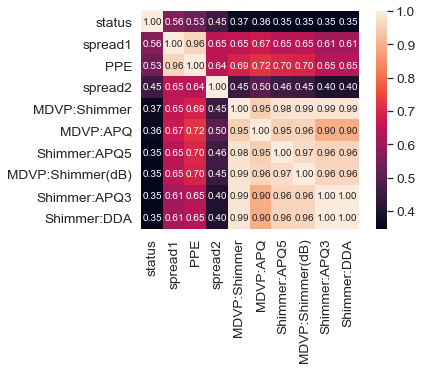

In [3]:
#histogram is not possible as we have 22 attributes which is a very large number, so we use heatmap instead for our convenience
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
corr_map=parkinsonsdataset.corr()
k= 10
cols=corr_map.nlargest(k,'status')['status'].index
coff_values=np.corrcoef(parkinsonsdataset[cols].values.T)
sb.set(font_scale=1.25)
sb.heatmap(coff_values,cbar=True,annot=True,square=True,fmt='.2f',
           annot_kws={'size': 10},yticklabels=cols.values,xticklabels=cols.values)
plt.show()

In [4]:
correlation_values=parkinsonsdataset.corr()['status']
correlation_values.abs().sort_values(ascending=False)

status              1.000000
spread1             0.564838
PPE                 0.531039
spread2             0.454842
MDVP:Fo(Hz)         0.383535
MDVP:Flo(Hz)        0.380200
MDVP:Shimmer        0.367430
MDVP:APQ            0.364316
HNR                 0.361515
Shimmer:APQ5        0.351148
MDVP:Shimmer(dB)    0.350697
Shimmer:APQ3        0.347617
Shimmer:DDA         0.347608
D2                  0.340232
MDVP:Jitter(Abs)    0.338653
RPDE                0.308567
MDVP:PPQ            0.288698
MDVP:Jitter(%)      0.278220
MDVP:RAP            0.266668
Jitter:DDP          0.266646
DFA                 0.231739
NHR                 0.189429
MDVP:Fhi(Hz)        0.166136
Name: status, dtype: float64

In [5]:
#Creating Feature Matrix
cols = ["name","status"]
X = parkinsonsdataset.drop(cols,axis=1)
Y = parkinsonsdataset["status"]

In [6]:
#separate into TRAIN_TEST_SPLIT to prevent overfitting part
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=3)

X_train.shape, X_test.shape

((156, 22), (39, 22))

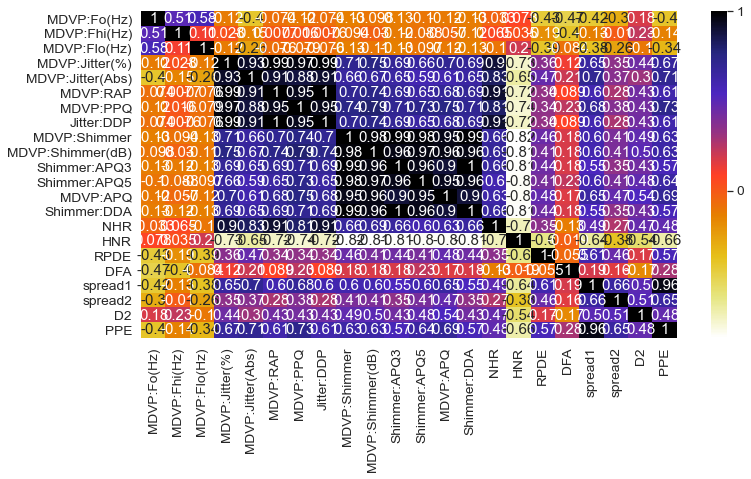

In [7]:
#heatmap for analyzing collinearality, this will be useful for feature selection, if we would apply that later on.
plt.figure(figsize=(12,6))
cor = X_train.corr()
sb.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
sb.set(font_scale=12)
plt.show()

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

model = KNeighborsClassifier(n_neighbors=7)
#now we are training our classifier
model.fit(X_train,Y_train)
pred = model.predict(X_test)

print("accuracy :{}".format(accuracy_score(Y_test,pred)))

accuracy :0.8717948717948718


In [9]:
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix


predicted_values = model.predict(X_train)
print("Accuracy score for Training data - ", accuracy_score(predicted_values, Y_train))


print("Precision score -", precision_score(Y_train, predicted_values))


print("Recall score - ", recall_score(Y_train, predicted_values))


print("F1 score - ", f1_score(Y_train, predicted_values))


print("Confusion matrix for training set - \n", confusion_matrix(Y_train, predicted_values))


print("\n")


Accuracy score for Training data -  0.8782051282051282
Precision score - 0.875
Recall score -  0.9739130434782609
F1 score -  0.9218106995884774
Confusion matrix for training set - 
 [[ 25  16]
 [  3 112]]




In [20]:
new_input = [[119.992,157.302,74.997,0.00784,0.00007,0.0037,0.00554,0.01109,0.04374,0.426,0.02182,0.0313,0.02971,0.06545,0.02211,21.033,	0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
]]
# get prediction for new input
new_output = model.predict(new_input)
if new_output== 1:
    print("This person has Parkinsons",new_output)
else:
    print("This person is healthy",new_output)

This person has Parkinsons [1]
